<div align="center">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.png)](https://colab.research.google.com/github/wisaaco/TallerPythonEBAP/blob/main/lessons/7_Pandas_Visualitzacions.ipynb)

Si no funciona el botó podeu copiar el següent [enllaç](https://colab.research.google.com/github/wisaaco/TallerPythonEBAP/blob/main/lessons/7_Pandas_Visualitzacions.ipynb)

</div>

# 5.C - Visualització

Pandas inclou una gran quantitat d'utilitats per a facilitar la representació gràfica d'un dataframe i de les seves sèries mitjançant l'ús de la llibreria `matplotlib`.

[Veure documentació](https://pandas.pydata.org/docs/user_guide/visualization.html).

La visualització de dades amb Pandas molt pràctica a causa del seu fàcil ús, i ens servirà per realitzar interpretacions de les dades que hem processat i a la realització d'informes.

Els gràfics de Pandas són una abstracció de la llibreria `matplotlib`  això ens permetrà realitzar alguns gràfics de manera senzilla. Si necessitem fer gràfics més complexos, podrem emprar les eines que `matplotlib` posa a la nostra disposició, encara que augmentant el codi necessari.

D'altra banda, veurem alguns exemples de visualització amb una altra llibreria anomenada [Seaborn](https://seaborn.pydata.org/). Aquesta una mica més moderna i es complementa molt bé amb `pandas`.

Encara que les possibilitats són pràcticament il·limitades, en aquesta secció ens limitarem a parlar sobre els tipus bàsics de visualització i dels elements necessaris per facilitar la interpretació (títols, tics als eixos, llegendes, selecció de colors, etc.). Els principals diagrames que podem realitzar són:
- Línies
- Barres
- Histogrames
- Diagrames de caixes (*boxplot*)
- Gràfics de dispersió (*scatter plot*)
 

## Plot
El mètode `plot` de Pandas s'utilitza per crear gràfics i visualitzacions de dades a partir d'objectes de tipus `DataFrame` i `Series`.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Generació de dades
np.random.seed(1)
samples = 50

df = pd.DataFrame({ 
    "temperatura":np.random.randint(low=-10,high=50,size=samples),
    "pluja":np.random.randint(low= 0,high=50,size=samples),
    "vent":np.random.choice(["N","S","E","W"],size=samples)})

df.head()

,temperatura,pluja,vent
0,27,42,W
1,33,8,N
2,2,30,E
3,-2,7,E
4,-1,3,E


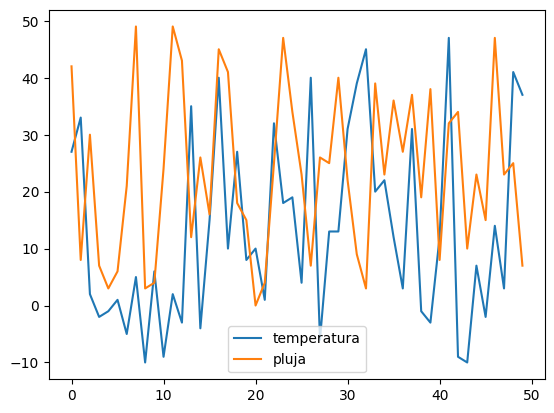

In [4]:
df.plot();# que passa si llevem el;

In [ ]:
df.temperatura.plot(); # Quines diferències a les dues gràfiques hi ha entre un dataframe i una sèrie?

La funció `plot` és molt versàtil però no funciona sempre, hem de vigilar amb el tipus de dades que mostram:

In [ ]:
df.vent.plot()

In [ ]:
df.groupby(["vent"]).count()

Hem realitzat una transformació de les dades i ara podrem construir un gràfic, tot i que aquest sembla que no té massa sentit:

In [ ]:
df[["vent","temperatura"]].groupby(["vent"]).count().plot();

### El paràmetre kind

Aquest paràmetre serveix per controlar el tipus de gràfic que mostrem, entre les opcions que es disposen tenim:
- `bar`: trama de barres verticals
- `barh`: trama de barres horitzontals
- `hist`: histograma
- `box`: trama de caixa
- `area`: parcel·la de superfície
- `pie`: trama de pastís
- `scatter`: gràfic de dispersió (només DataFrame)
- `hexbin`: trama hexbin (només DataFrame)

In [ ]:
df.groupby(["vent"]).size().plot(kind="bar"); #millor un de barres

In [ ]:
df.temperatura.plot(kind="hist"); # Si les dades són numèriques un histograma serveix

A més del tipus de gràfic la funció `plot` ens permet definir altres característiques del gràfic mitjançant diversos paràmetres:
- `title`: permet definir el títol d'un gràfic mitjançant un String.
- `legend`: booleà que indica si el gràfic porta llegenda o no.
- `xlabel`: etiqueta de l'eix x.
- `ylabel`: etiqueta de l'eix y.
- `colormap`: mapa de colors per dibuixar. [documentacio](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

Aquesta funció té alguns paràmetres més que podem consultar a la seva [documentació](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

Veiem com podem afegir una mica d'informació al nostre gràfic:

In [ ]:
df.groupby(["vent"]).size().plot(kind="bar", title="Procedencia del vent", ylabel="Nombre de dies", colormap="summer");

## Matplotlib

Com ja hem comentat a la introducció, `Pandas` internament utilitza la llibreria on es defineixen els components d'un gràfic. Es diu `Matplotlib` i permet fer visualitzacions avançades.

Emprant directament `Matplotlib` tenim un major control de les opcions de visualització. També podem guardar els nostres gràfics.

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() # Definició forma

ax.plot(df.temperatura) # Inserció de dades

plt.title("Temperatura ", fontsize=20) # Maquetació
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Celsius')

plt.savefig('data/test.png',dpi=100) # guardat
plt.show() # Visualització

Anem a reproduir el mateix gràfic dels dies de vent emprant `Matplolib`:

In [ ]:
tipusVent  = df.groupby(["vent"]).size()
print(tipusVent)

La funció bar necessita 2 informacions els valors de l'eix X i els seus corresponents valors de l'eix Y:

In [ ]:
x = tipusVent.index
y = tipusVent.values
print("x: ", tipusVent.index)
print("y: ", tipusVent.values)

fig, ax = plt.subplots() # Definició forma

ax.bar(x, y, color=['#5cb85c','#5bc0de','#d9534f','#59484a']) # Colors en hexadecimal
plt.title("Informació de vent");
plt.xlabel('Direccions', fontsize=14);
plt.ylabel('Dies', fontsize=14);



Un cop entram en la dinàmica de la llibreria i entenem les diferents funcions, tenim la capacitat de crear gràfics avançats:

Aquest gràfic està extret del següent tutorial [enllaç](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 4 #direccions
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

width = np.pi / y
colors = ["red","blue","green","black"] # també podem definir els colors amb un string

ax = plt.subplot(projection='polar')
ax.bar(theta, y, width=width, bottom=0.0, color=colors, alpha=0.5)
plt.title("Direccions dels vents \n")
plt.show()

## Tipus de visualitzacions

A continuació repassarem diferents tipus de visualitzacions, d'aquesta manera tindreu a la vostra disposició alguns exemples.

Existeix una galeria d'exemples molt útil que podeu trobar en el següent [enllaç](https://matplotlib.org/stable/gallery/index.html)

### Barres
Els diagrames de barres ens són molt útils, ja hem vist com dibuixar-los directament des d'un _dataframe_ i també emprant la llibreria `matplotlib`:

In [ ]:
df = pd.read_csv("../../lessons/data/WHO.csv")

co2 = df["Total_CO2_emissions"]
ticks_labels = df["Country"][1:10].values

ax = co2[1:10].plot(kind="bar") # un plot retorna el component ax, combinam les dues lliberies
ax.set_xticklabels(ticks_labels)
plt.show()

Anem a fer una segona versió, fent una selecció de les dades a mostrar:

In [ ]:
co2 = df["Total_CO2_emissions"].sort_values(ascending=False).head(10) 

dateSelect = df.loc[co2.index] # Noms
co2.index = dateSelect["Country"] 

ax = co2.plot(kind="bar") 
ax.set_ylabel("count")
plt.title("Principals països emissors de C02")
plt.show()

### Histogrames

Un histograma és una representació gràfica que mostra la distribució de dades numèriques en forma de barres verticals, on cada barra representa la freqüència o la quantitat de vegades que es produeixen valors dins d'un rang específic.


In [ ]:
co2 = df["Total_CO2_emissions"]
#co2.dropna(inplace=True) ##  NaN (NotAtNumber)
fig, ax = plt.subplots() # Definició forma
ax.hist(co2.values,bins=10) # la definició dels bins és molt rellevant en aquest tipus de gràfic ()
plt.show()


### Boxplots

Un diagrama de caixa, també conegut com a *boxplot* en anglès, és una representació gràfica que s'utilitza per mostrar la distribució i els estadístics clau d'un conjunt de dades. Aquesta representació consisteix en una caixa que abasta el quartil inferior (Q1) i el quartil superior (Q3) de les dades, amb una línia en el mig que indica la mediana. Les "whiskers" (o fletxes) s'estenen des de la caixa fins als valors màxims i mínims dins d'un rang específic, mentre que els punts fora d'aquest rang s'identifiquen com a valors atípics. Això permet visualitzar la dispersió, la simetria i les possibles valors atípics en un conjunt de dades de manera concisa.


In [ ]:
co2 = df["Total_CO2_emissions"]
co2.dropna(inplace=True)

fig, ax = plt.subplots(ncols=2)  # Podem definir múltiples plots en el mateix gràfic

ax[0].boxplot(co2.values*1000)
ax[1].hist(co2)

plt.show()

# On estan els valors ?

### Lineals

Anem a veure com podem construir una visualització completa amb diferents propietats, aprofitarem per fer un `plot` lineal:

In [ ]:
import numpy as np

xs = np.random.randn(3, 10000)
print(xs.shape)


In [ ]:
bms = xs.cumsum(axis=1)
print(bms.shape)
print(bms[:5])

In [ ]:
fig, ax = plt.subplots()
for bm in bms:
    ax.plot(bm)
plt.title("Random motion");

In [ ]:
labels = ["MarketX","IB35","S&P500"]
fig, ax = plt.subplots()
for e,bm in enumerate(bms):
    ax.plot(bm, label=labels[e])
plt.title("Random market motion")
plt.legend()    
plt.show()

In [ ]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

labels = ["MarketX","IB35","S&P500"]
lstyle = ["solid","dashdot","dotted"]
fig, ax = plt.subplots()
for e,bm in enumerate(bms):
    ax.plot(bm, label=labels[e],linestyle=lstyle[e])
plt.title("Random market motion")
plt.legend()    
plt.show()




In [ ]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html

labels = ["MarketX","IB35","S&P500"]
lstyle = ["solid","dashdot","dotted"]
fig, ax = plt.subplots(figsize=(18,10)) #diferent mida
for e,bm in enumerate(bms):
    ax.plot(bm, label=labels[e],linestyle=lstyle[e])

ax.vlines(x=4000,ymin=-50,ymax=50,color="red",linewidth=5) 
plt.title("Random market motion")
plt.legend(prop={'size': 20})    # Alerta! Prova de llevar aquesta "prop" (propietat)
plt.grid()  # grid # Alerta! El Grid moltes vegades no és necessari
plt.show()

In [ ]:
# Podem millorar certes visualitzacions de sèries fent filtratge de les dades
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

xs = np.random.randn(10000)
bms = xs.cumsum()
bmsMA = moving_average(bms,100)


fig, ax = plt.subplots(figsize=(18,10)) #diferent mida
ax.plot(bms, label="Original",color="gray")
ax.plot(bmsMA, label="Moving average",color="red",linewidth=3)
plt.title("Random market motion")
plt.legend(prop={'size': 20})   
plt.show()



## Llibrería Seaborn

Seaborn és una biblioteca de visualització de dades per a Python que s'utilitza per crear gràfics estadístics atractius i informatius. Aquesta biblioteca simplifica la creació de gràfics com histogrames, diagrames de caixa, gràfics de dispersió, i molts altres, i ofereix una interfície fàcil d'ús que permet personalitzar l'aparença dels gràfics.

[Plana web](https://seaborn.pydata.org/)

In [ ]:
%pip install seaborn

In [ ]:
import seaborn as sns

dfwho = pd.read_csv("data/WHO.csv", usecols=[0,1,2,185,67,4])
dfwho.columns =['Country', 'CountryID', 'Continent', 'LiteracyRate', 'TotalExpenditureHealth',
       'CO2_emissions']

continents = {1:"Africa",2:"Europa",3:"Africa",4:"North America",7:"Asia",6:"Asia",5:"South America"}
dfwho.replace({"Continent": continents},inplace=True)              
              
print(list(dfwho.columns))
print("Dimensions del dataframe:", dfwho.shape)



Tornarem a fer feina amb el "LiteracyRate".

És interessant veure que el disseny de `seaborn` s'integra directament amb els *dataframes*. En primer lloc indicam el *dataframe* i com a paràmetre y

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html

fig, ax = plt.subplots(figsize=(10, 8)) # Establim el marc de dibuix
sns.histplot(dfwho, x="LiteracyRate")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(dfwho,x="LiteracyRate", hue="Continent")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(dfwho,x="TotalExpenditureHealth", hue="Continent", multiple="stack")
plt.show()

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html

fig, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(x=dfwho["TotalExpenditureHealth"],y=dfwho.Continent)
plt.show()



In [ ]:
# https://seaborn.pydata.org/generated/seaborn.rugplot.html
import seaborn as sns; sns.set_theme()

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=dfwho, x="CO2_emissions", y="LiteracyRate",hue="Continent")
sns.rugplot(data=dfwho, x="CO2_emissions", y="LiteracyRate",hue="Continent")
plt.show()

#Africa valors?


## <span style="color:red">Activitat</span>
Intenta provar diferents opcions de gràfics, l'interessant és poder veure les diferents possibilitats que ens ofereixen les eines gràfiques.

A) Amb el fitxer who.csv,
- Podries mostrar un gràfic amb els 10 països més poblats ("Population (in thousands) total")? <br/>
- I un dels 10 menys poblats? <br/>

Nota: Recorda que els valos `Nan` afectaran la visualització.


B) Representa en un gràfic de barres el creixement de població (*Population annual growth rate (%)) dels països del top 10 més poblats.*

In [ ]:
#TODO

C) Representa amb un boxplot la contaminació (CO2) (`CO2_emissions`)d'Europa (codi continent: 2)


D) Amb el fitxer `data_groups.csv`, visualitza la distribució de ciutats i punts de candidats

In [ ]:
#TODO


E) Amb el fitxer `data_groups.csv`, visualitza la distribució de ciutats, punts de candidats i sexe.

In [ ]:
#TODO


[![License: CC BY 4.0](https://img.shields.io/badge/License-CC_BY_4.0-lightgrey.svg)](https://creativecommons.org/licenses/by/4.0/) <br/>
Isaac Lera and Gabriel Moya <br/>
Universitat de les Illes Balears <br/>
isaac.lera@uib.edu, gabriel.moya@uib.edu